# Análisis Estadístico: Satisfacción de Responsables Operativos

**Tesis de Ingeniería**  
**Fecha:** Octubre 2025  
**Indicador:** Nivel de Satisfacción (Escala Likert 1-5)

## Objetivo
Evaluar si la implementación del sistema aumentó significativamente la satisfacción de los responsables operativos.

---

In [1]:
# =============================================================================
# CONFIGURACIÓN INICIAL
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
import warnings
import os
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['savefig.dpi'] = 300

# Crear carpeta de resultados
os.makedirs('resultados_satisfaccion_simple', exist_ok=True)

print("✓ Configuración completada")

✓ Configuración completada


In [2]:
# =============================================================================
# CARGA DE DATOS
# =============================================================================

df = pd.read_csv('data/indicador2-simple/satisfaccion_responsables.csv')

print("="*70)
print("DATOS CARGADOS")
print("="*70)
print(df.to_string(index=False))
print("="*70)
print(f"\nn = {len(df)} responsables operativos (censo completo)")
print("Escala: 1-5 (Likert)")
print("Datos pareados: Mismas personas antes/después del sistema")

DATOS CARGADOS
id_responsable                cargo  turno  promedio_preprueba  promedio_postprueba
           R01   Jefe de Producción    NaN                2.67                 4.56
           R02     Supervisor Corte Mañana                2.56                 4.17
           R03   Supervisor Formado  Tarde                2.61                 3.89
           R04   Supervisor Sellado  Noche                2.22                 3.44
           R05    Jefe Turno Mañana Mañana                2.94                 4.44
           R06     Jefe Turno Tarde  Tarde                2.56                 4.00
           R07     Jefe Turno Noche  Noche                2.28                 3.72
           R08 Ingeniero de Proceso    NaN                3.11                 4.78

n = 8 responsables operativos (censo completo)
Escala: 1-5 (Likert)
Datos pareados: Mismas personas antes/después del sistema


In [3]:
# =============================================================================
# ESTADÍSTICOS DESCRIPTIVOS
# =============================================================================

# Extraer datos
preprueba = df['promedio_preprueba'].values
postprueba = df['promedio_postprueba'].values

# Calcular estadísticos
stats_data = {
    'Estadístico': ['Media', 'Desv. Estándar', 'Mínimo', 'Máximo'],
    'PREPRUEBA': [
        f"{np.mean(preprueba):.2f}",
        f"{np.std(preprueba, ddof=1):.2f}",
        f"{np.min(preprueba):.2f}",
        f"{np.max(preprueba):.2f}"
    ],
    'POSTPRUEBA': [
        f"{np.mean(postprueba):.2f}",
        f"{np.std(postprueba, ddof=1):.2f}",
        f"{np.min(postprueba):.2f}",
        f"{np.max(postprueba):.2f}"
    ]
}

df_stats = pd.DataFrame(stats_data)

# Calcular mejora
mejora_absoluta = np.mean(postprueba) - np.mean(preprueba)
mejora_porcentual = (mejora_absoluta / np.mean(preprueba)) * 100

print("\n" + "="*70)
print("ESTADÍSTICOS DESCRIPTIVOS")
print("="*70)
print(df_stats.to_string(index=False))
print("\n" + "-"*70)
print("MEJORA OBSERVADA")
print("-"*70)
print(f"Promedio PREPRUEBA:     {np.mean(preprueba):.2f} / 5.00")
print(f"Promedio POSTPRUEBA:    {np.mean(postprueba):.2f} / 5.00")
print(f"Mejora absoluta:        {mejora_absoluta:+.2f} puntos")
print(f"Mejora porcentual:      {mejora_porcentual:+.2f}%")
print("="*70)


ESTADÍSTICOS DESCRIPTIVOS
   Estadístico PREPRUEBA POSTPRUEBA
         Media      2.62       4.12
Desv. Estándar      0.30       0.45
        Mínimo      2.22       3.44
        Máximo      3.11       4.78

----------------------------------------------------------------------
MEJORA OBSERVADA
----------------------------------------------------------------------
Promedio PREPRUEBA:     2.62 / 5.00
Promedio POSTPRUEBA:    4.12 / 5.00
Mejora absoluta:        +1.51 puntos
Mejora porcentual:      +57.52%


---
## VISUALIZACIONES
---

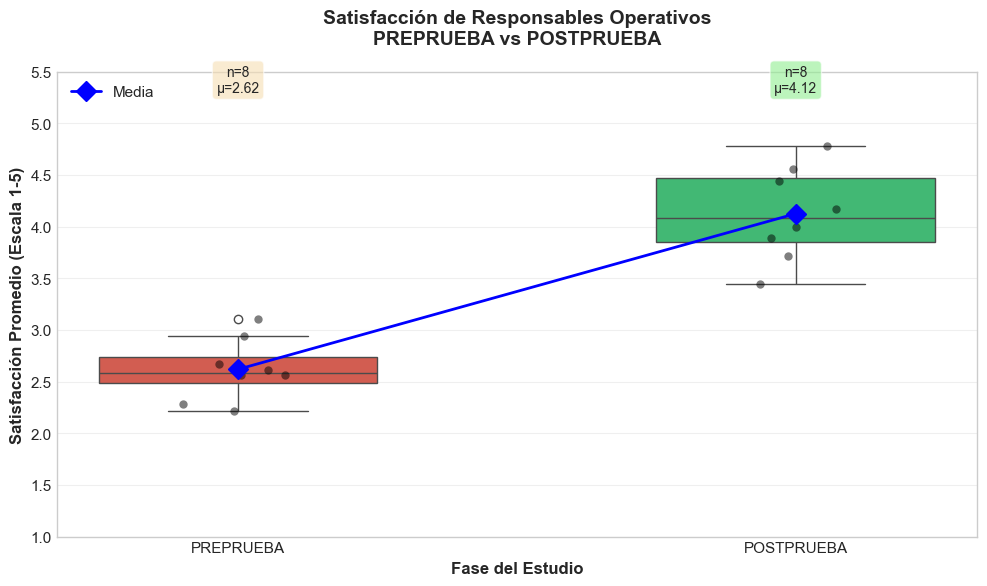

✓ Boxplot guardado


In [4]:
# =============================================================================
# VISUALIZACIÓN 1: BOXPLOT COMPARATIVO
# =============================================================================

# Preparar datos
data_plot = pd.DataFrame({
    'Satisfacción': np.concatenate([preprueba, postprueba]),
    'Fase': ['PREPRUEBA']*len(preprueba) + ['POSTPRUEBA']*len(postprueba)
})

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot
bp = sns.boxplot(x='Fase', y='Satisfacción', data=data_plot,
                 palette=['#E74C3C', '#2ECC71'], ax=ax, width=0.5)

# Puntos individuales
sns.stripplot(x='Fase', y='Satisfacción', data=data_plot,
              color='black', alpha=0.5, size=6, ax=ax)

# Línea de medias
medias = [np.mean(preprueba), np.mean(postprueba)]
ax.plot([0, 1], medias, 'D-', color='blue', markersize=10,
        linewidth=2, label=f'Media', zorder=10)

# Personalización
ax.set_title('Satisfacción de Responsables Operativos\nPREPRUEBA vs POSTPRUEBA',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Fase del Estudio', fontsize=12, fontweight='bold')
ax.set_ylabel('Satisfacción Promedio (Escala 1-5)', fontsize=12, fontweight='bold')
ax.set_ylim(1, 5.5)
ax.legend(loc='upper left', fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Anotaciones
ax.text(0, 5.3, f'n={len(preprueba)}\nμ={np.mean(preprueba):.2f}',
        ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))
ax.text(1, 5.3, f'n={len(postprueba)}\nμ={np.mean(postprueba):.2f}',
        ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.6))

plt.tight_layout()
plt.savefig('resultados_satisfaccion_simple/01_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Boxplot guardado")

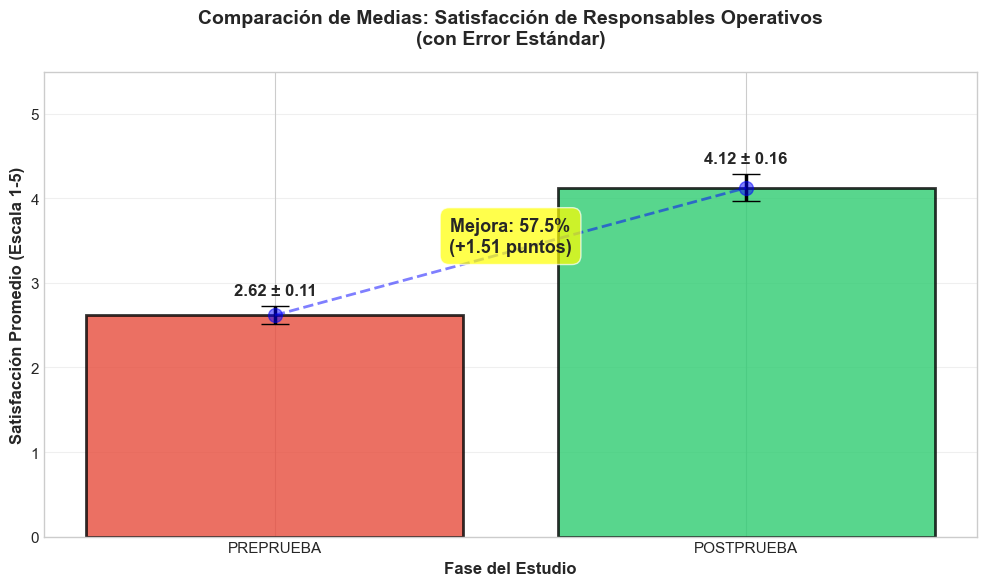

✓ Gráfico de barras guardado


In [5]:
# =============================================================================
# VISUALIZACIÓN 2: GRÁFICO DE BARRAS CON ERROR ESTÁNDAR
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

# Datos
fases = ['PREPRUEBA', 'POSTPRUEBA']
medias = [np.mean(preprueba), np.mean(postprueba)]
errores = [
    np.std(preprueba, ddof=1) / np.sqrt(len(preprueba)),
    np.std(postprueba, ddof=1) / np.sqrt(len(postprueba))
]
colores = ['#E74C3C', '#2ECC71']

# Crear barras
barras = ax.bar(fases, medias, yerr=errores, capsize=10,
                color=colores, alpha=0.8, edgecolor='black', linewidth=2,
                error_kw={'linewidth': 2.5, 'ecolor': 'black'})

# Valores sobre las barras
for i, (bar, media, error) in enumerate(zip(barras, medias, errores)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error + 0.1,
            f'{media:.2f} ± {error:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Línea de conexión
ax.plot([0, 1], medias, 'b--', linewidth=2, alpha=0.5, marker='o', markersize=10)

# Anotación de mejora
ax.annotate(f'Mejora: {mejora_porcentual:.1f}%\n({mejora_absoluta:+.2f} puntos)',
            xy=(0.5, np.mean(medias)), fontsize=13, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            ha='center')

# Personalización
ax.set_title('Comparación de Medias: Satisfacción de Responsables Operativos\n(con Error Estándar)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Satisfacción Promedio (Escala 1-5)', fontsize=12, fontweight='bold')
ax.set_xlabel('Fase del Estudio', fontsize=12, fontweight='bold')
ax.set_ylim(0, 5.5)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('resultados_satisfaccion_simple/02_barras_medias.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico de barras guardado")

---
## ANÁLISIS INFERENCIAL
---

In [6]:
# =============================================================================
# PRUEBA DE WILCOXON (Muestras Pareadas)
# =============================================================================

# Realizar prueba de Wilcoxon
w_stat, p_valor = wilcoxon(preprueba, postprueba, alternative='two-sided')

# Nivel de significancia
alpha = 0.05

# Tamaño del efecto (r de Rosenthal)
from scipy import stats as sp_stats
n = len(preprueba)
z_score = sp_stats.norm.ppf(1 - p_valor/2)
r_efecto = z_score / np.sqrt(n)

def interpretar_r(r):
    r_abs = abs(r)
    if r_abs < 0.1:
        return "INSIGNIFICANTE (r < 0.1)"
    elif r_abs < 0.3:
        return "PEQUEÑO (0.1 ≤ r < 0.3)"
    elif r_abs < 0.5:
        return "MEDIANO (0.3 ≤ r < 0.5)"
    else:
        return "GRANDE (r ≥ 0.5)"

print("\n" + "="*70)
print("PRUEBA DE WILCOXON (No Paramétrica - Apropiada para Likert)")
print("="*70)
print(f"\nH0: No hay diferencia en satisfacción (PRE = POST)")
print(f"H1: Hay diferencia significativa en satisfacción (PRE ≠ POST)")
print(f"\nNivel de significancia: α = {alpha}")
print(f"\nRESULTADOS:")
print(f"  • Estadístico W: {w_stat:.4f}")
print(f"  • p-valor:       {p_valor:.6f}")
print(f"  • Decisión:      {'RECHAZAR H0' if p_valor < alpha else 'NO RECHAZAR H0'}")
print(f"\nTAMAÑO DEL EFECTO:")
print(f"  • r de Rosenthal: {r_efecto:.4f}")
print(f"  • Interpretación: {interpretar_r(r_efecto)}")
print("\n" + "="*70)
print("CONCLUSIÓN:")
print("="*70)
if p_valor < alpha:
    print(f"✅ Existe evidencia estadísticamente SIGNIFICATIVA (p = {p_valor:.6f} < {alpha})")
    print(f"   de que la satisfacción AUMENTÓ después de implementar el sistema.")
    print(f"\n   Mejora observada: {mejora_absoluta:.2f} puntos ({mejora_porcentual:.2f}%)")
    print(f"   Tamaño del efecto: {interpretar_r(r_efecto)}")
else:
    print(f"❌ NO existe evidencia estadísticamente significativa (p = {p_valor:.6f} ≥ {alpha})")
    print(f"   de que el sistema haya aumentado la satisfacción.")
print("="*70)


PRUEBA DE WILCOXON (No Paramétrica - Apropiada para Likert)

H0: No hay diferencia en satisfacción (PRE = POST)
H1: Hay diferencia significativa en satisfacción (PRE ≠ POST)

Nivel de significancia: α = 0.05

RESULTADOS:
  • Estadístico W: 0.0000
  • p-valor:       0.007812
  • Decisión:      RECHAZAR H0

TAMAÑO DEL EFECTO:
  • r de Rosenthal: 0.9405
  • Interpretación: GRANDE (r ≥ 0.5)

CONCLUSIÓN:
✅ Existe evidencia estadísticamente SIGNIFICATIVA (p = 0.007812 < 0.05)
   de que la satisfacción AUMENTÓ después de implementar el sistema.

   Mejora observada: 1.51 puntos (57.52%)
   Tamaño del efecto: GRANDE (r ≥ 0.5)


---
## RESUMEN FINAL
---

In [7]:
# =============================================================================
# TABLA RESUMEN DE RESULTADOS
# =============================================================================

resumen_data = {
    'Métrica': [
        'n (muestra)',
        'Media PREPRUEBA',
        'Media POSTPRUEBA',
        'Mejora absoluta',
        'Mejora porcentual',
        'Estadístico W',
        'p-valor',
        'Significancia (α=0.05)',
        'Tamaño del efecto (r)',
        'Interpretación'
    ],
    'Valor': [
        f"{n}",
        f"{np.mean(preprueba):.2f}",
        f"{np.mean(postprueba):.2f}",
        f"{mejora_absoluta:+.2f} puntos",
        f"{mejora_porcentual:+.2f}%",
        f"{w_stat:.4f}",
        f"{p_valor:.6f}",
        f"{'SÍ (p < 0.05)' if p_valor < alpha else 'NO (p ≥ 0.05)'}",
        f"{r_efecto:.4f}",
        f"{interpretar_r(r_efecto)}"
    ]
}

df_resumen = pd.DataFrame(resumen_data)

print("\n" + "="*70)
print("TABLA RESUMEN DE RESULTADOS")
print("="*70)
print(df_resumen.to_string(index=False))
print("="*70)


TABLA RESUMEN DE RESULTADOS
               Métrica            Valor
           n (muestra)                8
       Media PREPRUEBA             2.62
      Media POSTPRUEBA             4.12
       Mejora absoluta     +1.51 puntos
     Mejora porcentual          +57.52%
         Estadístico W           0.0000
               p-valor         0.007812
Significancia (α=0.05)    SÍ (p < 0.05)
 Tamaño del efecto (r)           0.9405
        Interpretación GRANDE (r ≥ 0.5)


In [8]:
# =============================================================================
# GUARDAR RESUMEN EN ARCHIVO DE TEXTO
# =============================================================================

resumen_texto = f"""
{'='*70}
    RESUMEN ESTADÍSTICO - SATISFACCIÓN DE RESPONSABLES
{'='*70}

Fecha del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*70}
1. DISEÑO DEL ESTUDIO
{'='*70}

Tipo:              Cuasi-experimental pre-post
Muestra:           n = {n} responsables operativos (censo completo)
Escala:            Likert 1-5 (ordinal)
Datos:             Pareados (mismas personas antes/después)

{'='*70}
2. ESTADÍSTICOS DESCRIPTIVOS
{'='*70}

PREPRUEBA:
  Media:           {np.mean(preprueba):.2f} / 5.00
  Desv. Estándar:  {np.std(preprueba, ddof=1):.2f}
  Mínimo:          {np.min(preprueba):.2f}
  Máximo:          {np.max(preprueba):.2f}

POSTPRUEBA:
  Media:           {np.mean(postprueba):.2f} / 5.00
  Desv. Estándar:  {np.std(postprueba, ddof=1):.2f}
  Mínimo:          {np.min(postprueba):.2f}
  Máximo:          {np.max(postprueba):.2f}

MEJORA OBSERVADA:
  Absoluta:        {mejora_absoluta:+.2f} puntos
  Porcentual:      {mejora_porcentual:+.2f}%

{'='*70}
3. PRUEBA ESTADÍSTICA (WILCOXON)
{'='*70}

H0: No hay diferencia en satisfacción (PRE = POST)
H1: Hay diferencia significativa (PRE ≠ POST)

Estadístico W:     {w_stat:.4f}
p-valor:           {p_valor:.6f}
Nivel α:           {alpha}
Decisión:          {'RECHAZAR H0' if p_valor < alpha else 'NO RECHAZAR H0'}

Tamaño del efecto:
  r de Rosenthal:  {r_efecto:.4f}
  Interpretación:  {interpretar_r(r_efecto)}

{'='*70}
4. CONCLUSIÓN
{'='*70}

"""

if p_valor < alpha:
    resumen_texto += f"""
✅ Existe evidencia estadísticamente SIGNIFICATIVA (p = {p_valor:.6f} < {alpha})
   de que la implementación del sistema AUMENTÓ la satisfacción de los
   responsables operativos.

   - Mejora promedio: {mejora_absoluta:.2f} puntos (escala 1-5)
   - Mejora porcentual: {mejora_porcentual:.2f}%
   - Tamaño del efecto: {interpretar_r(r_efecto)}

   Estos resultados VALIDAN LA HIPÓTESIS DE INVESTIGACIÓN.
"""
else:
    resumen_texto += f"""
❌ NO existe evidencia estadísticamente significativa (p = {p_valor:.6f} ≥ {alpha})
   de que el sistema haya aumentado la satisfacción.

   Se recomienda:
   - Aumentar tamaño muestral si es posible
   - Realizar seguimiento más prolongado
"""

resumen_texto += f"""
{'='*70}
5. ARCHIVOS GENERADOS
{'='*70}

Gráficos (carpeta resultados_satisfaccion_simple/):
  1. 01_boxplot.png          - Boxplot comparativo
  2. 02_barras_medias.png    - Barras con error estándar

Reporte:
  - resumen_satisfaccion.txt - Este archivo

{'='*70}
FIN DEL REPORTE
{'='*70}
"""

# Guardar archivo
with open('resultados_satisfaccion_simple/resumen_satisfaccion.txt', 'w', encoding='utf-8') as f:
    f.write(resumen_texto)

print("\n" + "="*70)
print("✅ ANÁLISIS COMPLETADO")
print("="*70)
print(f"\n📁 Archivos generados:")
print(f"   ✓ 01_boxplot.png")
print(f"   ✓ 02_barras_medias.png")
print(f"   ✓ resumen_satisfaccion.txt")
print(f"\n📊 Resultado:")
print(f"   • Mejora: {mejora_porcentual:+.2f}% ({mejora_absoluta:+.2f} puntos)")
print(f"   • p-valor: {p_valor:.6f}")
print(f"   • Significancia: {'SÍ (p < 0.05)' if p_valor < alpha else 'NO (p ≥ 0.05)'}")
print(f"   • Tamaño efecto: {interpretar_r(r_efecto)}")
print("\n" + "="*70)


✅ ANÁLISIS COMPLETADO

📁 Archivos generados:
   ✓ 01_boxplot.png
   ✓ 02_barras_medias.png
   ✓ resumen_satisfaccion.txt

📊 Resultado:
   • Mejora: +57.52% (+1.51 puntos)
   • p-valor: 0.007812
   • Significancia: SÍ (p < 0.05)
   • Tamaño efecto: GRANDE (r ≥ 0.5)



---

## 📌 Instrucciones de Uso

**Ejecutar:**
1. `Run All` o `Shift+Enter` en cada celda
2. Resultados se guardan en `resultados_satisfaccion_simple/`

**Análisis incluye:**
- ✅ Estadísticos descriptivos (media, DE, min, max)
- ✅ 2 visualizaciones profesionales (boxplot + barras)
- ✅ Prueba de Wilcoxon (apropiada para Likert)
- ✅ Tamaño del efecto (r de Rosenthal)
- ✅ Tabla resumen + archivo de texto

**Escala:** Likert 1-5 (ordinal)  
**α:** 0.05  
**n:** 8 responsables (censo completo)

---